# California Housing Price Prediction

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

## Loading the data and Exploratory data analysis - EDA

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\Projects\Projects for submission\California Housing Price Prediction\Dataset for the project\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


## Handling missing values

In [5]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [6]:
data = data.fillna(data.mean())

In [7]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

## Encoding categorical data

In [8]:
df_with_dummies = pd.get_dummies( data, columns = ['ocean_proximity'] )

## Splitting the dataset into training and testing datasets

In [9]:
train, test = train_test_split(df_with_dummies, test_size=0.3)
columnKey = train.columns.get_loc('median_house_value')
median_income_columnKey = train.columns.get_loc('median_income')

## Standardizing the data

In [10]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [11]:
y_train=train[:, columnKey]
y_test=test[:, columnKey]
X_train = np.delete(train,columnKey,axis = 1)
X_test = np.delete(test,columnKey,axis = 1)

## Performing Linear Regression

### Performing Linear Regression on training data

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Intercept on y axis:")
print(lm.intercept_)
print("Coefficient of x:")
print(lm.coef_)

Intercept on y axis:
-9.608851726583572e-17
Coefficient of x:
[-0.4426556  -0.44714983  0.11659904 -0.11969499  0.31234251 -0.37714294
  0.22533355  0.64932464  0.05573679 -0.11192309  0.02199525  0.02382578
  0.04939976]


### Predicting output for test dataset using the fitted model

In [13]:
y_pred = lm.predict(X_test)
print("Predicted values:")
y_pred

Predicted values:


array([-1.01458582, -0.59739617, -1.00503971, ..., -0.42602405,
       -0.18670295,  0.13214955])

### Printing root mean squared error (RMSE) from Linear Regression

In [14]:
print("Root mean square error value:")
sqrt(mean_squared_error(y_test, y_pred))

Root mean square error value:


0.5990392627095358

## Performing Decision Tree Regression

### Performing Decision Tree Regression on training data

In [15]:
decisiontree = DecisionTreeRegressor(random_state=0)
DT_model = decisiontree.fit(X_train, y_train)

### Predicting output for test dataset using the fitted model

In [16]:
y_DT_pred=DT_model.predict(X_test)
print("Predicted values:")
y_DT_pred

Predicted values:


array([-1.46884466, -0.94499649,  2.54907084, ..., -0.80860484,
       -0.76429927,  0.97491142])

### Printing root mean squared error (RMSE) from Decision Tree Regression¶

In [17]:
print("Root mean square error value:")
sqrt(mean_squared_error(y_test, y_DT_pred))

Root mean square error value:


0.6491807291021379

## Performing Random Forest Regression

### Performing Random Forest Regression on training data

In [18]:
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
RF_model = randomforest.fit(X_train, y_train)

### Predicting output for test dataset using the fitted model

In [19]:
y_RF_Pred=RF_model.predict(X_test)
print("Predicted values:")
y_RF_Pred

Predicted values:


array([-1.00737178, -0.89652098,  0.91175861, ..., -0.76490739,
       -0.49386157,  0.39120729])

### Printing root mean squared error (RMSE) from Random Forest Regression

In [20]:
print("Root mean square error value:")
sqrt(mean_squared_error(y_test, y_RF_Pred))

Root mean square error value:


0.47807363062255315

## Performing Linear Regression with one independent variable (Bonus exercise)

### Extracting just the median_income column from the independent variables (from X_train and X_test)

In [21]:
X_train_median_income=train[:, median_income_columnKey]
X_test_median_income=test[:, median_income_columnKey]

### Performing Linear Regression to predict housing values based on median_income

In [22]:
lm_one_variable = LinearRegression()
X_train_median_income = X_train_median_income.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
lm_one_variable.fit(X_train_median_income, y_train)
print("Intercept on y axis:")
print(lm_one_variable.intercept_)
print("Coefficient of x:")
print(lm_one_variable.coef_)

Intercept on y axis:
[-1.18931179e-16]
Coefficient of x:
[[0.69052915]]


### Predicting output for test dataset using the fitted model

In [23]:
X_test_median_income = X_test_median_income.reshape(-1, 1)
y_pred_one_variable = lm_one_variable.predict(X_test_median_income)
print("Predicted values:")
y_pred_one_variable

Predicted values:


array([[-0.54912813],
       [-0.29981251],
       [-0.39999265],
       ...,
       [-0.21717561],
       [ 0.54572082],
       [-0.38760072]])

In [24]:
y_test =y_test.reshape(-1, 1)
print("Root mean square error value:")
sqrt(mean_squared_error(y_test, y_pred_one_variable))

Root mean square error value:


0.7309573753900346

### Plotting the fitted model against training data 

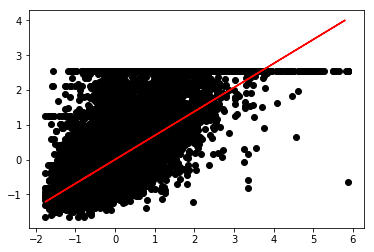

In [25]:
plt.scatter(X_train_median_income.ravel(), y_train.ravel(), color='black')
plt.plot(X_test_median_income.ravel(), y_pred_one_variable.ravel(), color='red')

### Plotting the fitted model against testing data

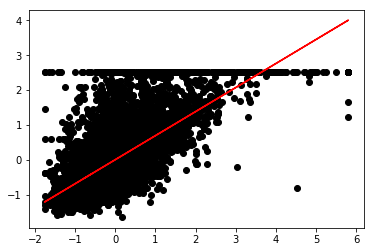

In [26]:
plt.scatter(X_test_median_income.ravel(), y_test.ravel(), color='black')
plt.plot(X_test_median_income.ravel(), y_pred_one_variable.ravel(), color='red')